<h1><center> Neural Network</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract




[Back to Contents](#Contents)

# Introduction

Deep learning or Neural Network is one of the hottest topic in technology world. If you know big data, you probably already heard this topic. With computational loads and expenses getting higher, Neural Network has become the popular machine learning tool. 

Neural network is a class of models within the general machine learning literature. It is inspired by biological neural networks, huamn brain's architecture. Neurons in a neural newtork use an initial input, together with creates weighted values and bias values based on the input as a total input, and then using matrix multiplication along with activation functions to give a new value as an output. It is similar to human brain. 

Neural Network is composed of several layers, mapping inputs to outputs and finding the correlations between them. Those layers are made of nodes which are the places where the computations happen. Each node combines input from the data with a set of coefficients, or weights, that either promote or demote that input, therefore we have different weights on the input values. These input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine which and what should be carrying further in this networkd to create the output. If anything passes through, the neuron has been “activated.” The following is a work flow that shows how neural network works. [2]

<center><img src='NN_plot.png'></center>

The data in this project comes from the large hadron collider (LHC) at CERN to classify the relatively newly found Higgs Boson as it either tau tau decays or the measurement was just background. Given the paper Searching for Exotic Particles in High-Energy Physics with Deep Learning[3], we have established a replica Neural Network with the paper’s architecture using Tensorflow. We have also trained on this data and answered the following questions:

- How close we get to the original results?


- Based on the class notes and discussion suggest improvements to the procedure"

        - What are standard practices now versus when this paper was written?  
        
        - What kind of improvements do they provide?
        
        - How would you quantify if your result duplicated the paper’s?


[Back to Contents](#Contents)

# Background


## Data Set Information:

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.


## Attribute Information:

The first column is the class label (1 for signal, 0 for background), followed by the 28 features (21 low-level features then 7 high-level features): lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. For more detailed information about each feature see the original paper.


[Back to Contents](#Contents)

# Methods

In order to find an optimal neural network for the data we have used, we will build our neural network architecture with different processes meaning one part of the network at a time. There are a variety of parameters we have been altering. They are hidden layers, nodes, activation function, batch size, kernel initializion functions and optimization functions. 

###  Hidden Layers and Nodes
Hidden layers receive input from a previous layer (if it is the first hidden layer, input would be the input layer, if not it would be the previous hidden layer) and outputs until the next layer (whether it be the next hidden layer or the final output layer). Hidden layers are made up of neurons/nodes that receive input values from a bias value and all of the previous layer's neurons that are multiplied by their associated weights. These neurons take this matrix math and apply an activation function to yield an output for each of the neurons at the next layer. The more hidden layers added to the model can give the model more power but this comes at the cost of computational time by increasing the amount of math needed to compute during each epoch.

### Activation Functions
Activation functions are mathematical functions that map an input value into an output value. The variation in each activation function allows the mapping of outputs to different values to accomplish different results. This allows for the contruction of both linear and non-linear models. For our purposes, we will only focus on the non-linear functions.
- Sigmoid Function
- Tanh Function 
- ReLU Function
- ELU/SELU Function

### Kernel Initialization Functions
### Optimization Functions(learning rate etc)
### Batch Size


[Back to Contents](#Contents)

# Results


<center>Table 1: Hyper-parameter choices for <b>deep networks</b>. Shown are the considered value for each hyper-parameter.</center>

|Hyper-parameters | Choices|
|------|------|
|Depth | 2, 3, 4, 5, 6 layers|
|Hidden units per layer | 100, 200, 300, 500|
|Initial learning rate | 0.01, 0.05|
|Weight decay |0, $10^-5$|
|Pre-training | none, autoencoder|


<center> Table 2: Hyper-parameter choices for <b>shallow networks</b>. Shown are the considered value for each hyper-parameter.</center>

|Hyper-parameters| Choices|
|------|------|
|Hidden units |300, 1000, 2000, 10000|
|Initial learning rate |0.05, 0.005, 0.0005|
|Weight decay |0, $10^-5$|

<center> Table 3: <b>Study of network size and
    depth</b>. Comparison of shallow networks with different num-
bers of hidden units (single hidden layer), and deep networks
with varying hidden layers in terms of the Area Under the
ROC Curve (AUC) for the HIGGS benchmark. The deep
networks have 300 units in each hidden layer. </center>


|Technique| Low-level |High-level |Complete|
|------|------|------|------|
|NN 300-hidden |0:733 |0:777| 0:816|
|NN 1000-hidden |0:788 |0:783| 0:841|
|NN 2000-hidden |0:787| 0:788| 0:842|
|NN 10000-hidden| 0:790 |0:789 |0:841|
|DN 3 layers| 0:836 |0:791 |0:850|
|DN 4 layers| 0:868 |0:797 |0:872|
|DN 5 layers| 0:880 |0:800| 0:885|
|DN 6 layers| 0:888| 0:799| 0:893|


[Back to Contents](#Contents)

# Conclusion



[Back to Contents](#Contents)

# References

[1] Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)

[2] https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786

[3] https://skymind.ai/wiki/neural-network#concrete

[4] https://arxiv.org/pdf/1402.4735.pdf

[5] https://www.tensorflow.org/api_docs/python/tf/keras/

[6] https://www.tensorflow.org/tutorials/keras/overfit_and_underfit


[Back to Contents](#Contents)

# Appendix: Codes




[Back to Contents](#Contents)

In [4]:
#!pip install ml_metrics 
# !pip install tensorflow --upgrade --trusted-host pypi.org --trusted-host files.pythonhosted.org
#!pip install -q pyyaml

### Import Packages

In [5]:
import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd ;print("pandas:",pd.__version__)
import numpy as np;print("numpy:",np.__version__)
from sklearn.model_selection import train_test_split
from time import time
from tensorflow.keras.callbacks import TensorBoard;print("tensorflow keras: ",tf.keras.__version__)


import csv
import seaborn as sns;
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter('ignore')

%matplotlib inline
tb = TensorBoard(log_dir=f"logs\\{time()}")


tensorflow: 1.14.0
pandas: 0.24.2
numpy: 1.16.4
tensorflow keras:  2.2.4-tf


## Import data and exploring
* Please download the data from https://archive.ics.uci.edu/ml/datasets/HIGGS and save it into your local folder as it is big.


In [6]:
df_HIGGS = pd.read_csv("D:\MyWork\SMU\MSDS7333\HIGGS.csv") # Bin Yu's path
#df_HIGGS = pd.read_csv('data\\HIGGS.csv', header=None, low_memory=False) # Yejur's path

In [7]:
# Populating with columns and feature labels
cols=['class label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']
features=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']
df_HIGGS.columns=cols

In [8]:
df_HIGGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 29 columns):
class label                 float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                 

In [9]:
df_HIGGS.head()

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [10]:
df_HIGGS.isna().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [11]:
df_HIGGS['class label'].value_counts()

1.0    5829122
0.0    5170877
Name: class label, dtype: int64

#### FOR TESTING CODE WITH SHORT SAMPLE WHICH SHOULD BE BALANCED ENOUGH

In [12]:
short_df_HIGGS = df_HIGGS[0:5000]  # only first 5K records both with equal number of classes (need to verify)
short_df_HIGGS['class label'].value_counts()

1.0    2669
0.0    2331
Name: class label, dtype: int64

### Features and Targets

In [13]:
# y= np.array(df_HIGGS['class label'])

# X =np.array( df_HIGGS[features])


y= np.array(short_df_HIGGS['class label'])

X =np.array(short_df_HIGGS[features])


## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)

scaled_train_df = pd.DataFrame(scaled_train, columns=features)

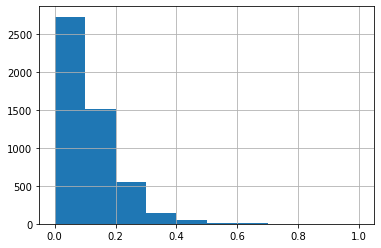

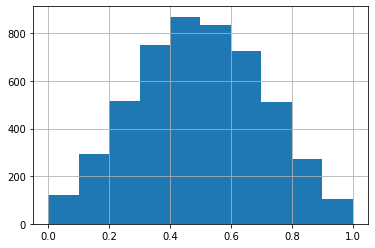

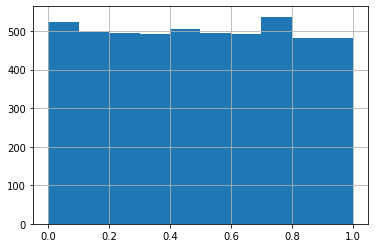

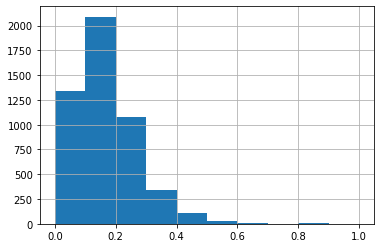

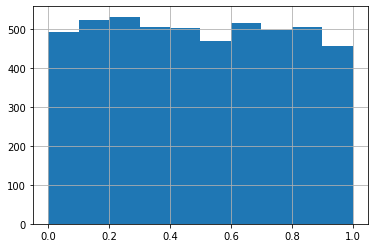

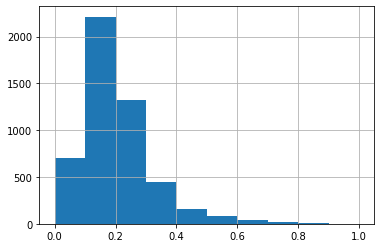

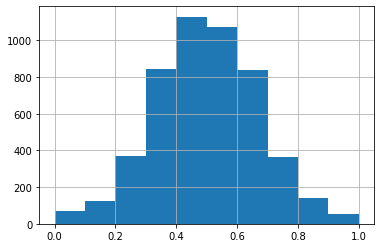

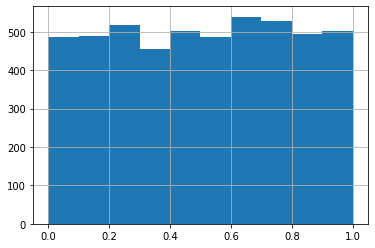

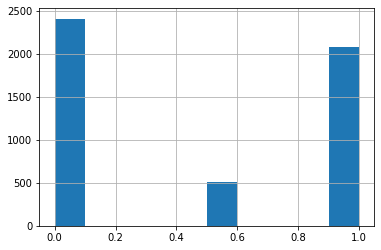

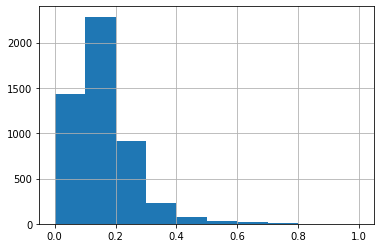

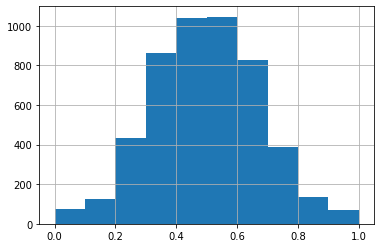

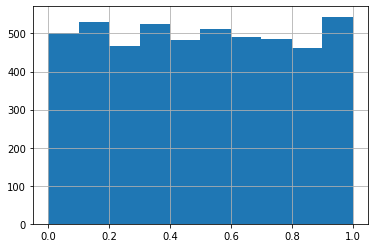

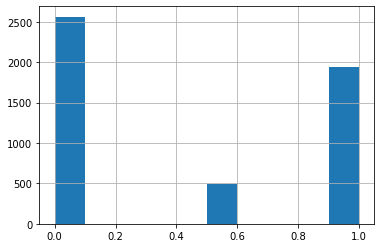

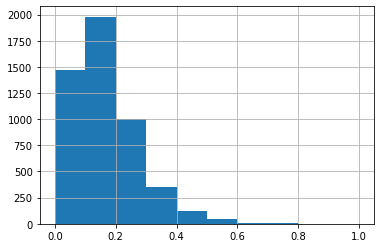

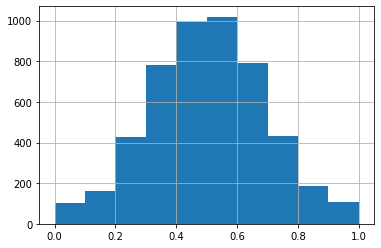

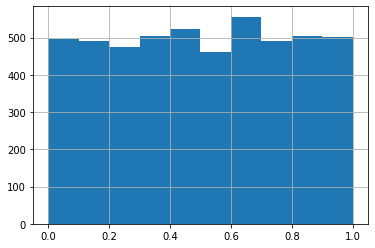

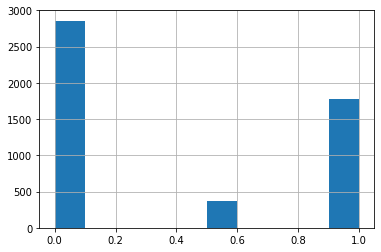

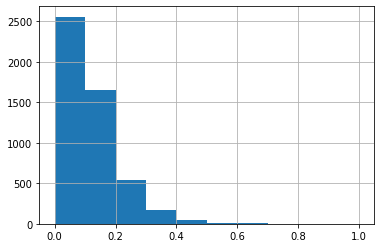

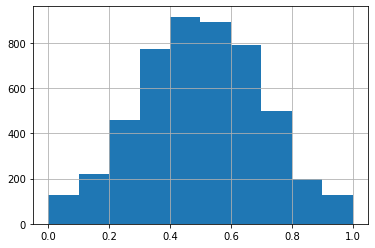

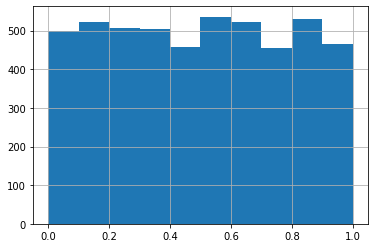

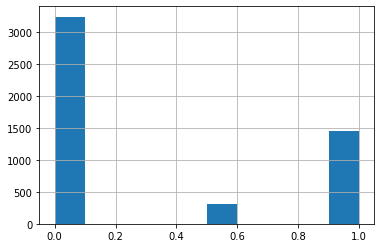

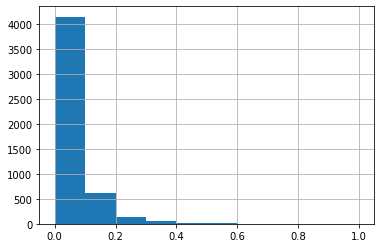

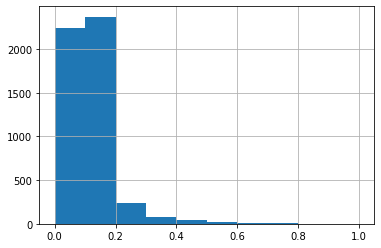

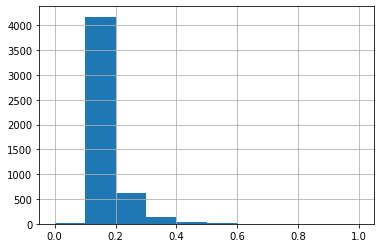

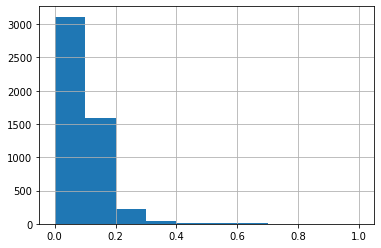

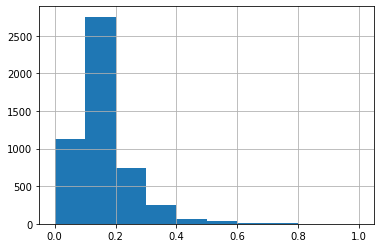

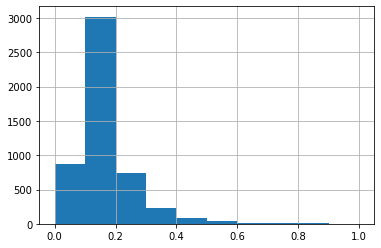

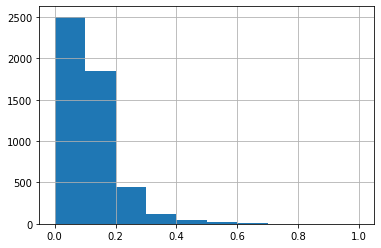

In [15]:

for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

# # plot to look at distribution accross features
# f, axes = plt.subplots(len(scaled_train_df.columns), 4, figsize=(20, 15), sharex=False)
# for i in scaled_train_df:
#     sns.distplot( scaled_train_df[i] , color="skyblue")#, ax=axes[0, 0])
    

## Train/Test Split

In [16]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

## Model

- The Sequential() class is used to build a model. Then we add layers after layer to model in respective orders. This is using Tensorflow package and Keras API in tensorflow. 

In [47]:
# Calling class Sequential(), adding layers with sigmoid activation
def tensorflow_keras_model(Num_layers=1, units=300, activation_func='tanh',learning_rate=0.01
                           ,metrics=['mean_squared_error'],batch_size=100,epochs=10
                          ,weight_decay=0):
    model= tf.keras.Sequential()
    for i in range(Num_layers):
        model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        
    model.add(layers.Dense(3 ,activation=activation_func))

    #compile the model
    model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=metrics)
    # fit the model
    results = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[tb])

    plt.plot(results.history['loss'], label='train')
    plt.plot(results.history['val_loss'], label='test')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    return results

### Shallow Learning

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - ETA: 2s - loss: 6.1219 - mean_squared_error: 0.98 - 0s 46us/sample - loss: 3.3174 - mean_squared_error: 1.4218 - val_loss: 0.7365 - val_mean_squared_error: 1.1354
Epoch 2/10
4000/4000 [==============================] - 0s 10us/sample - loss: 0.7256 - mean_squared_error: 1.1299 - val_loss: 0.7368 - val_mean_squared_error: 1.1347
Epoch 3/10
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7219 - mean_squared_error: 1.1296 - val_loss: 0.7364 - val_mean_squared_error: 1.1353
Epoch 4/10
4000/4000 [==============================] - 0s 12us/sample - loss: 0.7217 - mean_squared_error: 1.1300 - val_loss: 0.7362 - val_mean_squared_error: 1.1356
Epoch 5/10
4000/4000 [==============================] - 0s 9us/sample - loss: 0.7217 - mean_squared_error: 1.1303 - val_loss: 0.7363 - val_mean_squared_error: 1.1353
Epoch 6/10
4000/4000 [==============================] - 0s 16us/sa

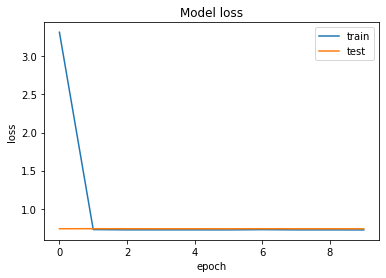

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 45us/sample - loss: 1.2567 - mean_squared_error: 2.2913 - val_loss: 1.1116 - val_mean_squared_error: 2.3771
Epoch 2/10
4000/4000 [==============================] - 0s 13us/sample - loss: 1.1025 - mean_squared_error: 2.3633 - val_loss: 1.1111 - val_mean_squared_error: 2.3773
Epoch 3/10
4000/4000 [==============================] - 0s 10us/sample - loss: 1.1025 - mean_squared_error: 2.3636 - val_loss: 1.1103 - val_mean_squared_error: 2.3776
Epoch 4/10
4000/4000 [==============================] - 0s 11us/sample - loss: 1.1028 - mean_squared_error: 2.3640 - val_loss: 1.0991 - val_mean_squared_error: 2.3779
Epoch 5/10
4000/4000 [==============================] - 0s 9us/sample - loss: 1.1028 - mean_squared_error: 2.3645 - val_loss: 1.0991 - val_mean_squared_error: 2.3782
Epoch 6/10
4000/4000 [==============================] - 0s 16us/sample - loss: 1.1028 - mean_squared_error: 2.3647 - v

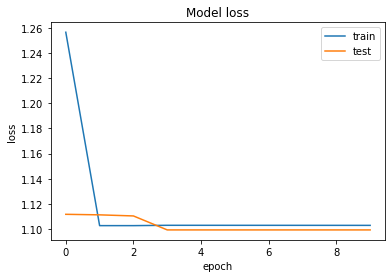

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 46us/sample - loss: 0.9328 - mean_squared_error: 0.6220 - val_loss: 0.6935 - val_mean_squared_error: 0.7504
Epoch 2/10
4000/4000 [==============================] - 0s 12us/sample - loss: 0.6959 - mean_squared_error: 0.7749 - val_loss: 0.6896 - val_mean_squared_error: 0.8071
Epoch 3/10
4000/4000 [==============================] - 0s 9us/sample - loss: 0.6932 - mean_squared_error: 0.8125 - val_loss: 0.6882 - val_mean_squared_error: 0.8345
Epoch 4/10
4000/4000 [==============================] - 0s 9us/sample - loss: 0.6920 - mean_squared_error: 0.8345 - val_loss: 0.6875 - val_mean_squared_error: 0.8493
Epoch 5/10
4000/4000 [==============================] - 0s 12us/sample - loss: 0.6911 - mean_squared_error: 0.8455 - val_loss: 0.6870 - val_mean_squared_error: 0.8599
Epoch 6/10
4000/4000 [==============================] - 0s 11us/sample - loss: 0.6904 - mean_squared_error: 0.8526 - va

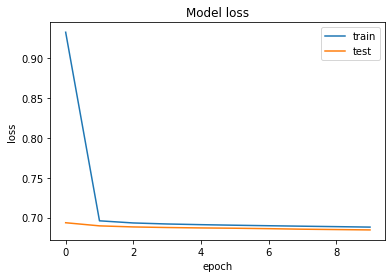

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 50us/sample - loss: 1.1907 - mean_squared_error: 0.8020 - val_loss: 0.7023 - val_mean_squared_error: 0.8168
Epoch 2/10
4000/4000 [==============================] - 0s 9us/sample - loss: 0.7071 - mean_squared_error: 0.8351 - val_loss: 0.6972 - val_mean_squared_error: 0.8377
Epoch 3/10
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7050 - mean_squared_error: 0.8488 - val_loss: 0.6957 - val_mean_squared_error: 0.8489
Epoch 4/10
4000/4000 [==============================] - 0s 15us/sample - loss: 0.7040 - mean_squared_error: 0.8572 - val_loss: 0.6949 - val_mean_squared_error: 0.8569
Epoch 5/10
4000/4000 [==============================] - 0s 12us/sample - loss: 0.6999 - mean_squared_error: 0.8674 - val_loss: 0.6938 - val_mean_squared_error: 0.8671
Epoch 6/10
4000/4000 [==============================] - 0s 14us/sample - loss: 0.6987 - mean_squared_error: 0.8746 - v

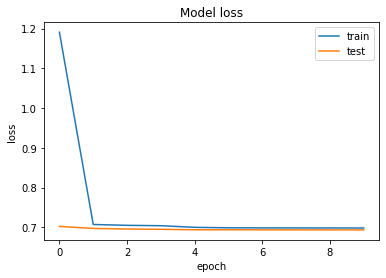

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 50us/sample - loss: 2.8474 - mean_squared_error: 0.3766 - val_loss: 1.0894 - val_mean_squared_error: 0.3241
Epoch 2/10
4000/4000 [==============================] - 0s 13us/sample - loss: 0.9343 - mean_squared_error: 0.3643 - val_loss: 0.8598 - val_mean_squared_error: 0.3970
Epoch 3/10
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7991 - mean_squared_error: 0.4451 - val_loss: 0.7752 - val_mean_squared_error: 0.4769
Epoch 4/10
4000/4000 [==============================] - 0s 14us/sample - loss: 0.7449 - mean_squared_error: 0.5161 - val_loss: 0.7333 - val_mean_squared_error: 0.5361
Epoch 5/10
4000/4000 [==============================] - 0s 11us/sample - loss: 0.7270 - mean_squared_error: 0.5648 - val_loss: 0.7212 - val_mean_squared_error: 0.5769
Epoch 6/10
4000/4000 [==============================] - 0s 13us/sample - loss: 0.7159 - mean_squared_error: 0.6003 - 

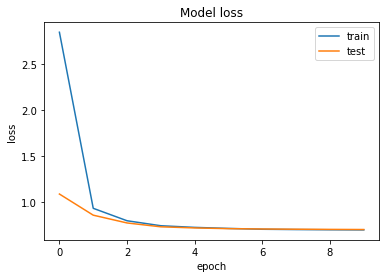

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 49us/sample - loss: 2.1654 - mean_squared_error: 1.7080 - val_loss: 1.2367 - val_mean_squared_error: 1.9852
Epoch 2/10
4000/4000 [==============================] - 0s 15us/sample - loss: 1.1518 - mean_squared_error: 2.1965 - val_loss: 1.1112 - val_mean_squared_error: 2.3228
Epoch 3/10
4000/4000 [==============================] - 0s 10us/sample - loss: 1.1148 - mean_squared_error: 2.3139 - val_loss: 1.1112 - val_mean_squared_error: 2.3264
Epoch 4/10
4000/4000 [==============================] - 0s 14us/sample - loss: 1.1145 - mean_squared_error: 2.3204 - val_loss: 1.1111 - val_mean_squared_error: 2.3329
Epoch 5/10
4000/4000 [==============================] - 0s 11us/sample - loss: 1.1117 - mean_squared_error: 2.3225 - val_loss: 1.1110 - val_mean_squared_error: 2.3350
Epoch 6/10
4000/4000 [==============================] - 0s 10us/sample - loss: 1.1115 - mean_squared_error: 2.3249 - 

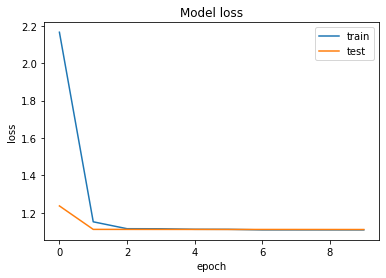

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 55us/sample - loss: 0.9621 - mean_squared_error: 1.1370 - val_loss: 0.6910 - val_mean_squared_error: 1.1563
Epoch 2/10
4000/4000 [==============================] - 0s 15us/sample - loss: 0.6902 - mean_squared_error: 1.1507 - val_loss: 0.6897 - val_mean_squared_error: 1.1556
Epoch 3/10
4000/4000 [==============================] - 0s 18us/sample - loss: 0.6890 - mean_squared_error: 1.1508 - val_loss: 0.6878 - val_mean_squared_error: 1.1524
Epoch 4/10
4000/4000 [==============================] - 0s 15us/sample - loss: 0.6876 - mean_squared_error: 1.1494 - val_loss: 0.6877 - val_mean_squared_error: 1.1533
Epoch 5/10
4000/4000 [==============================] - 0s 18us/sample - loss: 0.6867 - mean_squared_error: 1.1479 - val_loss: 0.6864 - val_mean_squared_error: 1.1505
Epoch 6/10
4000/4000 [==============================] - 0s 16us/sample - loss: 0.6851 - mean_squared_error: 1.1465 - 

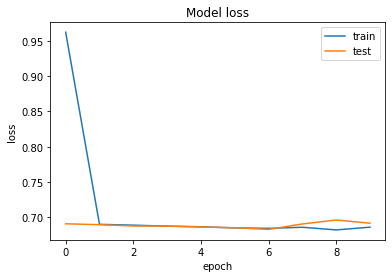

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 62us/sample - loss: 0.8449 - mean_squared_error: 1.1607 - val_loss: 0.6932 - val_mean_squared_error: 1.1769
Epoch 2/10
4000/4000 [==============================] - 0s 13us/sample - loss: 0.6937 - mean_squared_error: 1.1754 - val_loss: 0.6933 - val_mean_squared_error: 1.1769
Epoch 3/10
4000/4000 [==============================] - 0s 17us/sample - loss: 0.6937 - mean_squared_error: 1.1754 - val_loss: 0.6933 - val_mean_squared_error: 1.1770
Epoch 4/10
4000/4000 [==============================] - 0s 13us/sample - loss: 0.6936 - mean_squared_error: 1.1755 - val_loss: 0.6933 - val_mean_squared_error: 1.1769
Epoch 5/10
4000/4000 [==============================] - 0s 16us/sample - loss: 0.6936 - mean_squared_error: 1.1755 - val_loss: 0.6933 - val_mean_squared_error: 1.1769
Epoch 6/10
4000/4000 [==============================] - 0s 16us/sample - loss: 0.6935 - mean_squared_error: 1.1755 - 

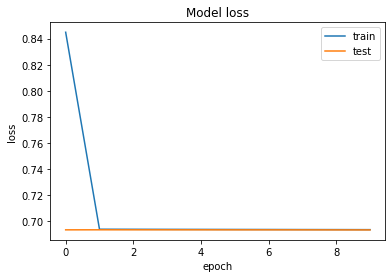

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 62us/sample - loss: 1.3187 - mean_squared_error: 1.1028 - val_loss: 0.6921 - val_mean_squared_error: 1.1080
Epoch 2/10
4000/4000 [==============================] - ETA: 0s - loss: 0.6982 - mean_squared_error: 1.11 - 0s 13us/sample - loss: 0.6926 - mean_squared_error: 1.1070 - val_loss: 0.6913 - val_mean_squared_error: 1.1107
Epoch 3/10
4000/4000 [==============================] - 0s 16us/sample - loss: 0.6921 - mean_squared_error: 1.1090 - val_loss: 0.6910 - val_mean_squared_error: 1.1119
Epoch 4/10
4000/4000 [==============================] - 0s 15us/sample - loss: 0.6917 - mean_squared_error: 1.1102 - val_loss: 0.6908 - val_mean_squared_error: 1.1125
Epoch 5/10
4000/4000 [==============================] - 0s 15us/sample - loss: 0.6915 - mean_squared_error: 1.1106 - val_loss: 0.6906 - val_mean_squared_error: 1.1128
Epoch 6/10
4000/4000 [==============================] - 0s 16us/s

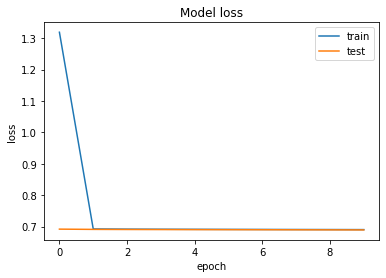

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 67us/sample - loss: 0.7252 - mean_squared_error: 0.5562 - val_loss: 0.6919 - val_mean_squared_error: 0.5924
Epoch 2/10
4000/4000 [==============================] - 0s 14us/sample - loss: 0.6914 - mean_squared_error: 0.6003 - val_loss: 0.6901 - val_mean_squared_error: 0.6153
Epoch 3/10
4000/4000 [==============================] - 0s 15us/sample - loss: 0.6897 - mean_squared_error: 0.6201 - val_loss: 0.6891 - val_mean_squared_error: 0.6272
Epoch 4/10
4000/4000 [==============================] - 0s 16us/sample - loss: 0.6884 - mean_squared_error: 0.6279 - val_loss: 0.6882 - val_mean_squared_error: 0.6334
Epoch 5/10
4000/4000 [==============================] - 0s 14us/sample - loss: 0.6873 - mean_squared_error: 0.6343 - val_loss: 0.6875 - val_mean_squared_error: 0.6387
Epoch 6/10
4000/4000 [==============================] - 0s 20us/sample - loss: 0.6863 - mean_squared_error: 0.6366 - 

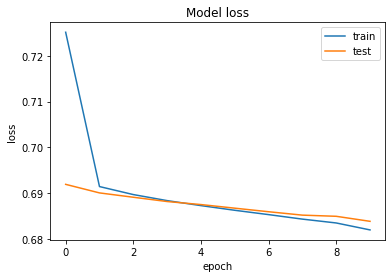

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 67us/sample - loss: 1.5362 - mean_squared_error: 1.3410 - val_loss: 1.1153 - val_mean_squared_error: 1.4624
Epoch 2/10
4000/4000 [==============================] - 0s 17us/sample - loss: 1.1179 - mean_squared_error: 1.5016 - val_loss: 1.1089 - val_mean_squared_error: 1.5433
Epoch 3/10
4000/4000 [==============================] - 0s 16us/sample - loss: 1.0983 - mean_squared_error: 1.5369 - val_loss: 1.1089 - val_mean_squared_error: 1.5433
Epoch 4/10
4000/4000 [==============================] - 0s 17us/sample - loss: 1.0983 - mean_squared_error: 1.5369 - val_loss: 1.1089 - val_mean_squared_error: 1.5433
Epoch 5/10
4000/4000 [==============================] - 0s 15us/sample - loss: 1.0983 - mean_squared_error: 1.5369 - val_loss: 1.1089 - val_mean_squared_error: 1.5433
Epoch 6/10
4000/4000 [==============================] - 0s 14us/sample - loss: 1.0983 - mean_squared_error: 1.5369 - 

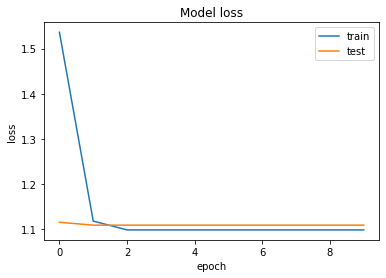

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 63us/sample - loss: 1.2059 - mean_squared_error: 0.7486 - val_loss: 0.6938 - val_mean_squared_error: 0.7538
Epoch 2/10
4000/4000 [==============================] - 0s 17us/sample - loss: 0.6979 - mean_squared_error: 0.7593 - val_loss: 0.6938 - val_mean_squared_error: 0.7575
Epoch 3/10
4000/4000 [==============================] - 0s 16us/sample - loss: 0.6979 - mean_squared_error: 0.7630 - val_loss: 0.6937 - val_mean_squared_error: 0.7608
Epoch 4/10
4000/4000 [==============================] - 0s 17us/sample - loss: 0.6978 - mean_squared_error: 0.7660 - val_loss: 0.6936 - val_mean_squared_error: 0.7641
Epoch 5/10
4000/4000 [==============================] - 0s 17us/sample - loss: 0.6978 - mean_squared_error: 0.7692 - val_loss: 0.6936 - val_mean_squared_error: 0.7668
Epoch 6/10
4000/4000 [==============================] - 0s 17us/sample - loss: 0.6978 - mean_squared_error: 0.7717 - 

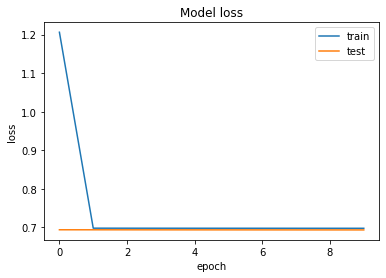

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 75us/sample - loss: 1.2194 - mean_squared_error: 2.5446 - val_loss: 1.0986 - val_mean_squared_error: 2.6108
Epoch 2/10
4000/4000 [==============================] - 0s 18us/sample - loss: 1.0986 - mean_squared_error: 2.5988 - val_loss: 1.0986 - val_mean_squared_error: 2.6108
Epoch 3/10
4000/4000 [==============================] - 0s 23us/sample - loss: 1.0986 - mean_squared_error: 2.5988 - val_loss: 1.0986 - val_mean_squared_error: 2.6108
Epoch 4/10
4000/4000 [==============================] - 0s 16us/sample - loss: 1.0986 - mean_squared_error: 2.5988 - val_loss: 1.0986 - val_mean_squared_error: 2.6108
Epoch 5/10
4000/4000 [==============================] - 0s 18us/sample - loss: 1.0986 - mean_squared_error: 2.5988 - val_loss: 1.0986 - val_mean_squared_error: 2.6108
Epoch 6/10
4000/4000 [==============================] - 0s 23us/sample - loss: 1.0986 - mean_squared_error: 2.5988 - 

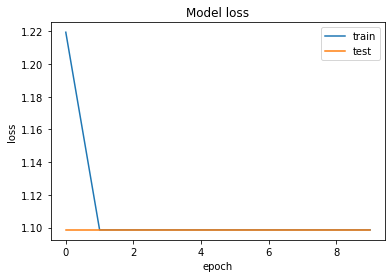

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 79us/sample - loss: 1.1898 - mean_squared_error: 2.2219 - val_loss: 1.0992 - val_mean_squared_error: 2.2744
Epoch 2/10
4000/4000 [==============================] - 0s 21us/sample - loss: 1.0987 - mean_squared_error: 2.2593 - val_loss: 1.0992 - val_mean_squared_error: 2.2743
Epoch 3/10
4000/4000 [==============================] - 0s 20us/sample - loss: 1.0987 - mean_squared_error: 2.2593 - val_loss: 1.0992 - val_mean_squared_error: 2.2743
Epoch 4/10
4000/4000 [==============================] - 0s 22us/sample - loss: 1.0987 - mean_squared_error: 2.2592 - val_loss: 1.0992 - val_mean_squared_error: 2.2742
Epoch 5/10
4000/4000 [==============================] - 0s 23us/sample - loss: 1.0987 - mean_squared_error: 2.2592 - val_loss: 1.0992 - val_mean_squared_error: 2.2742
Epoch 6/10
4000/4000 [==============================] - 0s 21us/sample - loss: 1.0987 - mean_squared_error: 2.2591 - 

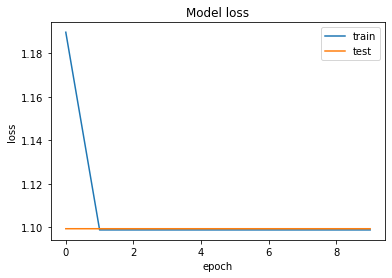

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 75us/sample - loss: 1.1927 - mean_squared_error: 1.6234 - val_loss: 1.0986 - val_mean_squared_error: 1.7037
Epoch 2/10
4000/4000 [==============================] - 0s 20us/sample - loss: 1.0983 - mean_squared_error: 1.6830 - val_loss: 1.0986 - val_mean_squared_error: 1.7037
Epoch 3/10
4000/4000 [==============================] - 0s 22us/sample - loss: 1.0983 - mean_squared_error: 1.6830 - val_loss: 1.0986 - val_mean_squared_error: 1.7037
Epoch 4/10
4000/4000 [==============================] - 0s 20us/sample - loss: 1.0983 - mean_squared_error: 1.6830 - val_loss: 1.0986 - val_mean_squared_error: 1.7037
Epoch 5/10
4000/4000 [==============================] - 0s 19us/sample - loss: 1.0983 - mean_squared_error: 1.6830 - val_loss: 1.0986 - val_mean_squared_error: 1.7037
Epoch 6/10
4000/4000 [==============================] - 0s 24us/sample - loss: 1.0983 - mean_squared_error: 1.6830 - 

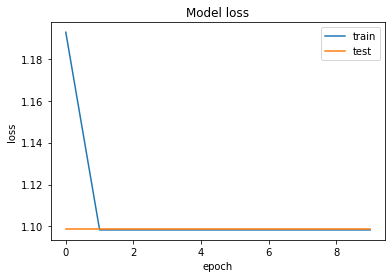

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 79us/sample - loss: 1.2248 - mean_squared_error: 2.0436 - val_loss: 1.0992 - val_mean_squared_error: 2.1150
Epoch 2/10
4000/4000 [==============================] - 0s 20us/sample - loss: 1.0992 - mean_squared_error: 2.1081 - val_loss: 1.0992 - val_mean_squared_error: 2.1150
Epoch 3/10
4000/4000 [==============================] - 0s 21us/sample - loss: 1.0992 - mean_squared_error: 2.1081 - val_loss: 1.0992 - val_mean_squared_error: 2.1150
Epoch 4/10
4000/4000 [==============================] - 0s 22us/sample - loss: 1.0992 - mean_squared_error: 2.1081 - val_loss: 1.0992 - val_mean_squared_error: 2.1150
Epoch 5/10
4000/4000 [==============================] - 0s 25us/sample - loss: 1.0992 - mean_squared_error: 2.1081 - val_loss: 1.0992 - val_mean_squared_error: 2.1150
Epoch 6/10
4000/4000 [==============================] - 0s 16us/sample - loss: 1.0992 - mean_squared_error: 2.1081 - 

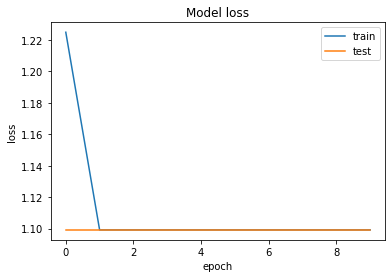

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 79us/sample - loss: 2.2453 - mean_squared_error: 1.0703 - val_loss: 1.1058 - val_mean_squared_error: 1.1966
Epoch 2/10
4000/4000 [==============================] - 0s 16us/sample - loss: 1.1085 - mean_squared_error: 1.2162 - val_loss: 1.1050 - val_mean_squared_error: 1.2455
Epoch 3/10
4000/4000 [==============================] - 0s 21us/sample - loss: 1.1035 - mean_squared_error: 1.2414 - val_loss: 1.0953 - val_mean_squared_error: 1.2551
Epoch 4/10
4000/4000 [==============================] - 0s 20us/sample - loss: 1.1012 - mean_squared_error: 1.2486 - val_loss: 1.0953 - val_mean_squared_error: 1.2601
Epoch 5/10
4000/4000 [==============================] - 0s 24us/sample - loss: 1.0983 - mean_squared_error: 1.2500 - val_loss: 1.0953 - val_mean_squared_error: 1.2601
Epoch 6/10
4000/4000 [==============================] - 0s 23us/sample - loss: 1.0983 - mean_squared_error: 1.2500 - 

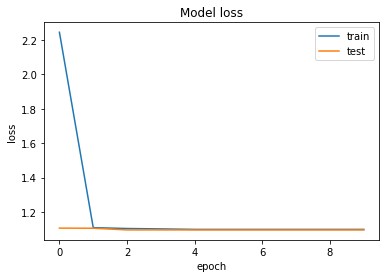

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s 80us/sample - loss: 1.0685 - mean_squared_error: 0.4569 - val_loss: 0.6985 - val_mean_squared_error: 0.4769
Epoch 2/10
4000/4000 [==============================] - 0s 22us/sample - loss: 0.7109 - mean_squared_error: 0.4881 - val_loss: 0.6904 - val_mean_squared_error: 0.4958
Epoch 3/10
4000/4000 [==============================] - 0s 21us/sample - loss: 0.7023 - mean_squared_error: 0.5021 - val_loss: 0.6879 - val_mean_squared_error: 0.5059
Epoch 4/10
4000/4000 [==============================] - 0s 22us/sample - loss: 0.6990 - mean_squared_error: 0.5109 - val_loss: 0.6868 - val_mean_squared_error: 0.5133
Epoch 5/10
4000/4000 [==============================] - 0s 20us/sample - loss: 0.6937 - mean_squared_error: 0.5168 - val_loss: 0.6862 - val_mean_squared_error: 0.5187
Epoch 6/10
4000/4000 [==============================] - 0s 25us/sample - loss: 0.6920 - mean_squared_error: 0.5219 - 

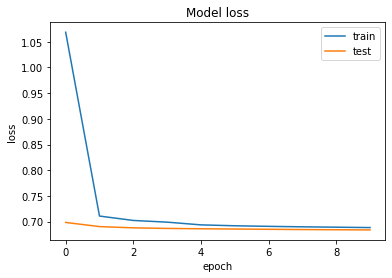

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 167us/sample - loss: 0.8521 - mean_squared_error: 1.1614 - val_loss: 0.6931 - val_mean_squared_error: 1.1790
Epoch 2/10
4000/4000 [==============================] - 0s 96us/sample - loss: 0.6931 - mean_squared_error: 1.1777 - val_loss: 0.6931 - val_mean_squared_error: 1.1790
Epoch 3/10
4000/4000 [==============================] - 0s 87us/sample - loss: 0.6931 - mean_squared_error: 1.1777 - val_loss: 0.6931 - val_mean_squared_error: 1.1790
Epoch 4/10
4000/4000 [==============================] - 0s 88us/sample - loss: 0.6931 - mean_squared_error: 1.1777 - val_loss: 0.6931 - val_mean_squared_error: 1.1790
Epoch 5/10
4000/4000 [==============================] - 0s 91us/sample - loss: 0.6931 - mean_squared_error: 1.1777 - val_loss: 0.6931 - val_mean_squared_error: 1.1790
Epoch 6/10
4000/4000 [==============================] - 0s 88us/sample - loss: 0.6931 - mean_squared_error: 1.1777 -

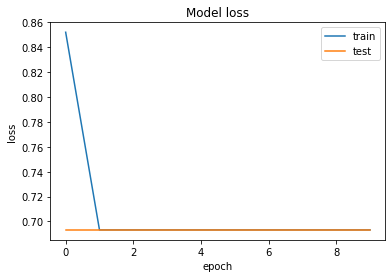

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 159us/sample - loss: 0.8366 - mean_squared_error: 1.1594 - val_loss: 0.6936 - val_mean_squared_error: 1.1785
Epoch 2/10
4000/4000 [==============================] - 0s 83us/sample - loss: 0.6938 - mean_squared_error: 1.1771 - val_loss: 0.6936 - val_mean_squared_error: 1.1784
Epoch 3/10
4000/4000 [==============================] - 0s 84us/sample - loss: 0.6937 - mean_squared_error: 1.1771 - val_loss: 0.6936 - val_mean_squared_error: 1.1784
Epoch 4/10
4000/4000 [==============================] - 0s 84us/sample - loss: 0.6937 - mean_squared_error: 1.1771 - val_loss: 0.6936 - val_mean_squared_error: 1.1784
Epoch 5/10
4000/4000 [==============================] - 0s 83us/sample - loss: 0.6937 - mean_squared_error: 1.1770 - val_loss: 0.6935 - val_mean_squared_error: 1.1784
Epoch 6/10
4000/4000 [==============================] - 0s 87us/sample - loss: 0.6937 - mean_squared_error: 1.1771 -

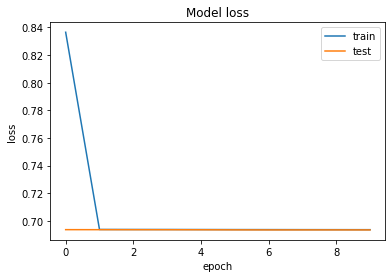

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 146us/sample - loss: 1.1737 - mean_squared_error: 1.8065 - val_loss: 1.0986 - val_mean_squared_error: 1.8539
Epoch 2/10
4000/4000 [==============================] - 0s 80us/sample - loss: 1.0986 - mean_squared_error: 1.8381 - val_loss: 1.0986 - val_mean_squared_error: 1.8539
Epoch 3/10
4000/4000 [==============================] - 0s 81us/sample - loss: 1.0986 - mean_squared_error: 1.8381 - val_loss: 1.0986 - val_mean_squared_error: 1.8539
Epoch 4/10
4000/4000 [==============================] - 0s 80us/sample - loss: 1.0986 - mean_squared_error: 1.8381 - val_loss: 1.0986 - val_mean_squared_error: 1.8539
Epoch 5/10
4000/4000 [==============================] - 0s 75us/sample - loss: 1.0986 - mean_squared_error: 1.8381 - val_loss: 1.0986 - val_mean_squared_error: 1.8539
Epoch 6/10
4000/4000 [==============================] - 0s 72us/sample - loss: 1.0986 - mean_squared_error: 1.8381 -

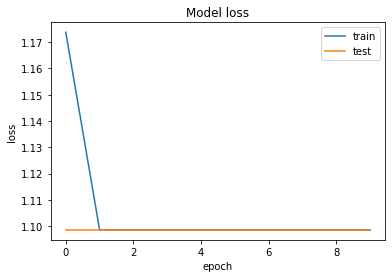

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 163us/sample - loss: 1.7113 - mean_squared_error: 1.8145 - val_loss: 1.1237 - val_mean_squared_error: 1.9215
Epoch 2/10
4000/4000 [==============================] - 0s 89us/sample - loss: 1.0967 - mean_squared_error: 1.9113 - val_loss: 1.1237 - val_mean_squared_error: 1.9215
Epoch 3/10
4000/4000 [==============================] - 0s 86us/sample - loss: 1.0967 - mean_squared_error: 1.9113 - val_loss: 1.1237 - val_mean_squared_error: 1.9215
Epoch 4/10
4000/4000 [==============================] - 0s 86us/sample - loss: 1.0967 - mean_squared_error: 1.9112 - val_loss: 1.1237 - val_mean_squared_error: 1.9215
Epoch 5/10
4000/4000 [==============================] - 0s 85us/sample - loss: 1.0967 - mean_squared_error: 1.9112 - val_loss: 1.1237 - val_mean_squared_error: 1.9215
Epoch 6/10
4000/4000 [==============================] - 0s 84us/sample - loss: 1.0967 - mean_squared_error: 1.9112 -

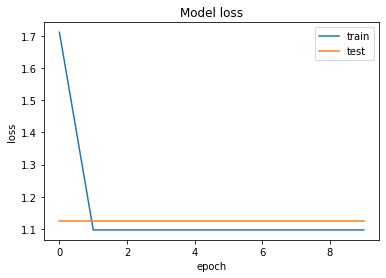

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 171us/sample - loss: 0.8221 - mean_squared_error: 0.4376 - val_loss: 0.7002 - val_mean_squared_error: 0.4435
Epoch 2/10
4000/4000 [==============================] - 0s 88us/sample - loss: 0.6933 - mean_squared_error: 0.4451 - val_loss: 0.6950 - val_mean_squared_error: 0.4495
Epoch 3/10
4000/4000 [==============================] - 0s 81us/sample - loss: 0.6904 - mean_squared_error: 0.4503 - val_loss: 0.6934 - val_mean_squared_error: 0.4536
Epoch 4/10
4000/4000 [==============================] - 0s 90us/sample - loss: 0.6893 - mean_squared_error: 0.4534 - val_loss: 0.6923 - val_mean_squared_error: 0.4564
Epoch 5/10
4000/4000 [==============================] - 0s 82us/sample - loss: 0.6886 - mean_squared_error: 0.4564 - val_loss: 0.6915 - val_mean_squared_error: 0.4588
Epoch 6/10
4000/4000 [==============================] - 0s 79us/sample - loss: 0.6880 - mean_squared_error: 0.4583 -

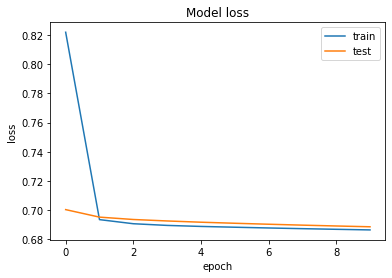

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 183us/sample - loss: 0.8027 - mean_squared_error: 0.4685 - val_loss: 0.6918 - val_mean_squared_error: 0.4647
Epoch 2/10
4000/4000 [==============================] - 0s 100us/sample - loss: 0.6921 - mean_squared_error: 0.4625 - val_loss: 0.6878 - val_mean_squared_error: 0.4660
Epoch 3/10
4000/4000 [==============================] - 0s 96us/sample - loss: 0.6890 - mean_squared_error: 0.4633 - val_loss: 0.6850 - val_mean_squared_error: 0.4668
Epoch 4/10
4000/4000 [==============================] - 0s 92us/sample - loss: 0.6875 - mean_squared_error: 0.4643 - val_loss: 0.6826 - val_mean_squared_error: 0.4676
Epoch 5/10
4000/4000 [==============================] - 0s 88us/sample - loss: 0.6853 - mean_squared_error: 0.4657 - val_loss: 0.6808 - val_mean_squared_error: 0.4700
Epoch 6/10
4000/4000 [==============================] - 0s 95us/sample - loss: 0.6833 - mean_squared_error: 0.4678 

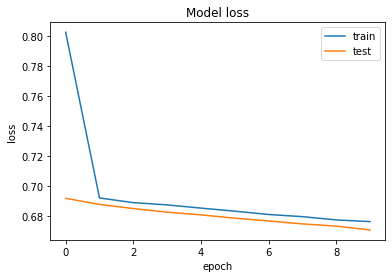

In [49]:
units_list = [300, 1000, 2000, 10000]
init_learning_rate_list= [0.05, 0.005, 0.0005]
weight_decay_list=[0,0.00001]

for units in units_list:
    for learning_rate in init_learning_rate_list:
        for weight_decay in weight_decay_list:
            print("NN-",units,"-hidden")
            tensorflow_keras_model(Num_layers=1, units=units,learning_rate=learning_rate,weight_decay=weight_decay)

* Original paper has a five-layer neuralnetwork with 300 hidden units in each layer, a learning rate of 0.05, and a weight decay coeficient of 1 x $10^-5$.

## Compile Model

- Compiles model and adds solver or optimizer, also calculates loss metrics

In [37]:
# Model compilation to add solver and get loss metrics
# I have to use CategoricalCrossentropy as SparseCategoricalCrossentropy gave me error

model.compile(optimizer=tf.train.GradientDescentOptimizer(0.05),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Fit the Model

- Train, Fit, and Validate model

In [39]:
%%time
model_1 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=100, callbacks=[tb])

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 0s 46us/sample - loss: 0.9248 - acc: 0.5278 - val_loss: 0.6913 - val_acc: 0.5370
Epoch 2/100
4000/4000 [==============================] - 0s 29us/sample - loss: 0.6906 - acc: 0.5330 - val_loss: 0.6903 - val_acc: 0.5370
Epoch 3/100
4000/4000 [==============================] - 0s 25us/sample - loss: 0.6897 - acc: 0.5330 - val_loss: 0.6938 - val_acc: 0.5370
Epoch 4/100
4000/4000 [==============================] - 0s 25us/sample - loss: 0.6893 - acc: 0.5330 - val_loss: 0.6900 - val_acc: 0.5370
Epoch 5/100
4000/4000 [==============================] - 0s 25us/sample - loss: 0.6906 - acc: 0.5337 - val_loss: 0.6931 - val_acc: 0.5350
Epoch 6/100
4000/4000 [==============================] - 0s 23us/sample - loss: 0.6931 - acc: 0.5343 - val_loss: 0.6931 - val_acc: 0.5350
Epoch 7/100
4000/4000 [==============================] - 0s 24us/sample - loss: 0.6931 - acc: 0.5343 - val_loss: 0.6931 - va

In [40]:
# np.argmax(model.predict(X_test),axis=1)

In [41]:
# y_test

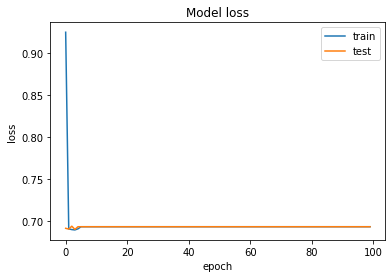

In [42]:
plt.plot(model_1.history['loss'], label='train')
plt.plot(model_1.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Visualizing in Tensorboard

Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser

In [43]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [44]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.05),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'accuracy'])

In [45]:
tp = [] # the true positive rate list
fp = [] # the false positive rate list
total = len(fp)
writer = tf.summary.FileWriter("/tmp/tensorboard_roc")
for idx in range(total):
    summt = tf.Summary()
    summt.value.add(tag="roc", simple_value = tp[idx])
    writer.add_summary (summt, tp[idx] * 100) #act as global_step
    writer.flush ()



In [ ]:
history = model.fit(scaled_train_df.values, y, epochs=10, batch_size=100, callbacks=[tb], verbose=2)
## plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [49]:
sess = tf.compat.v1.Session()
sess.close()

In [ ]:
#!tensorboard --logdir /tmp/tensorboard_roc 

# tensorboard --logdir path/to/logs
##(please use command line to do this)

# End of Case Study #10